# **Credit Loan Eligibility Prediction**

Author        : Kasun Gunathilake
Course	      : MSc. Computer Science
Student ID	  : B1923274
Module	      : Machine Learning
Module Code   : CIS4035-N
Module Leader : Dr. Alessandro Di Stefano
Department    : School of Computing, Engineering & Digital Technologies

# **Import Important Libraries & Data**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data set
df = pd.read_csv('dataset\data.csv')

# **Data Analysis**

In [3]:
#checking the number of raws and columns in data set
df.shape

(63999, 45)

In [4]:
#Take a look at the first 5 rows of the data set
df.head(5)

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0   58189336      14350        14350          14350.0  36 months   
1   70011223       4800         4800           4800.0  36 months   
2   70255675      10000        10000          10000.0  36 months   
3    1893936      15000        15000          15000.0  36 months   
4    7652106      16000        16000          16000.0  36 months   

  batch_enrolled  int_rate grade sub_grade                          emp_title  \
0                    19.19     E        E3                              clerk   
1     BAT1586599     10.99     B        B4         Human Resources Specialist   
2     BAT1586599      7.26     A        A4                             Driver   
3     BAT4808022     19.72     D        D5  Us office of Personnel Management   
4     BAT2833642     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   

   ... collections_12_mths_ex_med mths_since_last_major_derog  \
0  ...                        0.0                        74.0   
1  ...                        0.0                         NaN   
2  ...                        0.0                         NaN   
3  ...                        0.0                         NaN   
4  ...                        0.0                         NaN   

   application_type verification_status_joint last_week_pay acc_now_delinq  \
0        INDIVIDUAL                       NaN     26th week              0   
1        INDIVIDUAL                       NaN      9th week              0   
2        INDIVIDUAL                       NaN      9th week              0   
3        INDIVIDUAL                       NaN    135th week              0   
4        INDIVIDUAL                       NaN     96th week              0   

  tot_coll_amt tot_cur_bal total_rev_hi_lim loan_status  
0          0.0     28699.0          30800.0           0  
1          0.0      9974.0          32900.0           0  
2         65.0     38295.0          34900.0           0  
3          0.0     55564.0          24700.0           0  
4          0.0     47159.0          47033.0           0  

[5 rows x 45 columns]

In [5]:
# get a quick description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63999 entries, 0 to 63998
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   member_id                    63999 non-null  int64  
 1   loan_amnt                    63999 non-null  int64  
 2   funded_amnt                  63999 non-null  int64  
 3   funded_amnt_inv              63999 non-null  float64
 4   term                         63999 non-null  object 
 5   batch_enrolled               53735 non-null  object 
 6   int_rate                     63999 non-null  float64
 7   grade                        63999 non-null  object 
 8   sub_grade                    63999 non-null  object 
 9   emp_title                    60173 non-null  object 
 10  emp_length                   60675 non-null  object 
 11  home_ownership               63999 non-null  object 
 12  annual_inc                   63999 non-null  float64
 13  verification_sta

<AxesSubplot:>

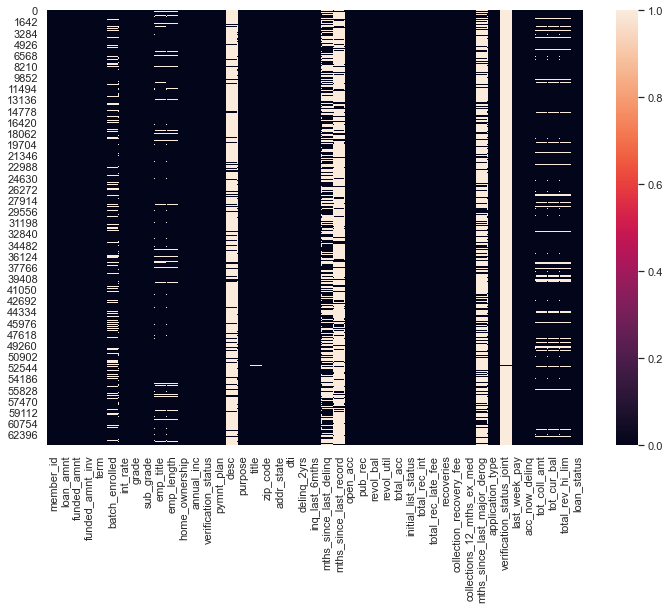

In [6]:
#Use a heatmap to visualize distribution of null values
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df.isnull())

In [7]:
#get the copy of original data set
dfcopy = df.copy()

**Analysing Numerical Data**

In [8]:
#Identifying numeric columns
num = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [9]:
#checking the number of raws and columns in cat data
df[num].shape

(63999, 27)

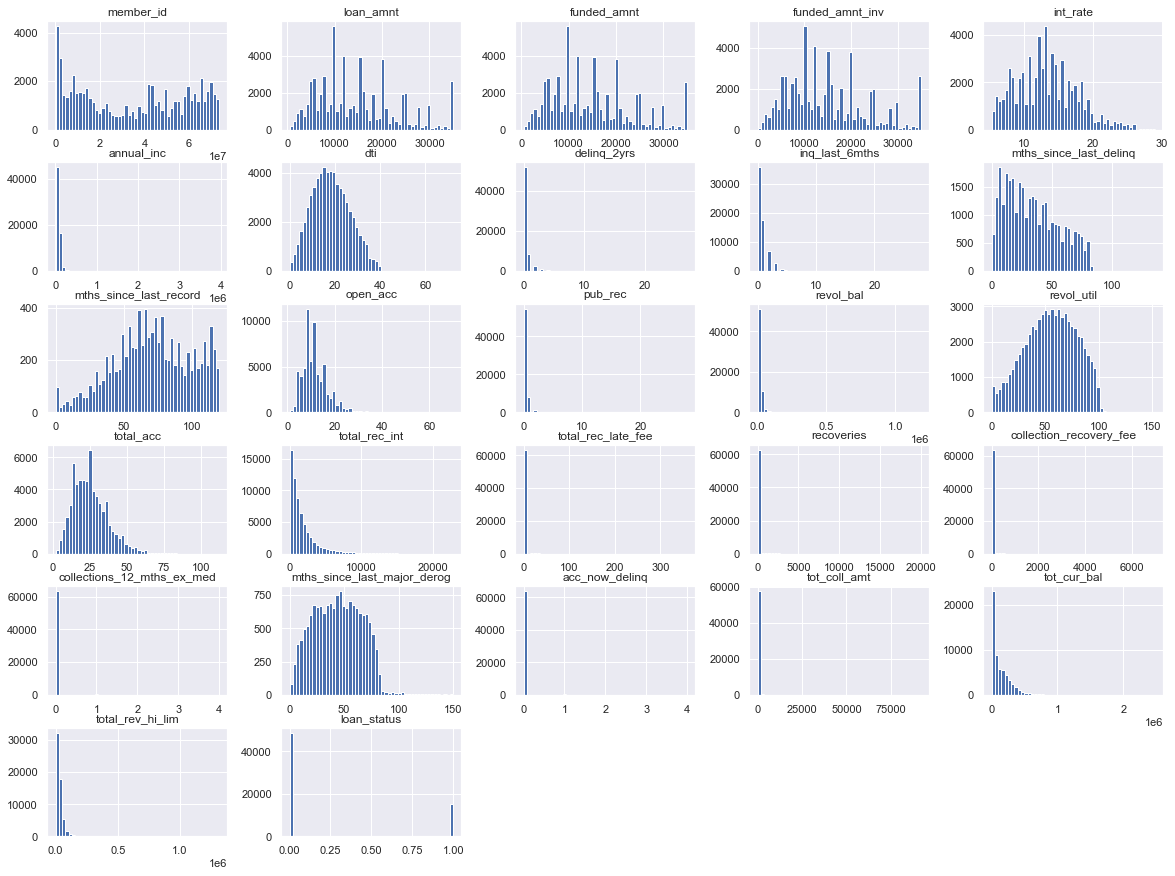

In [10]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

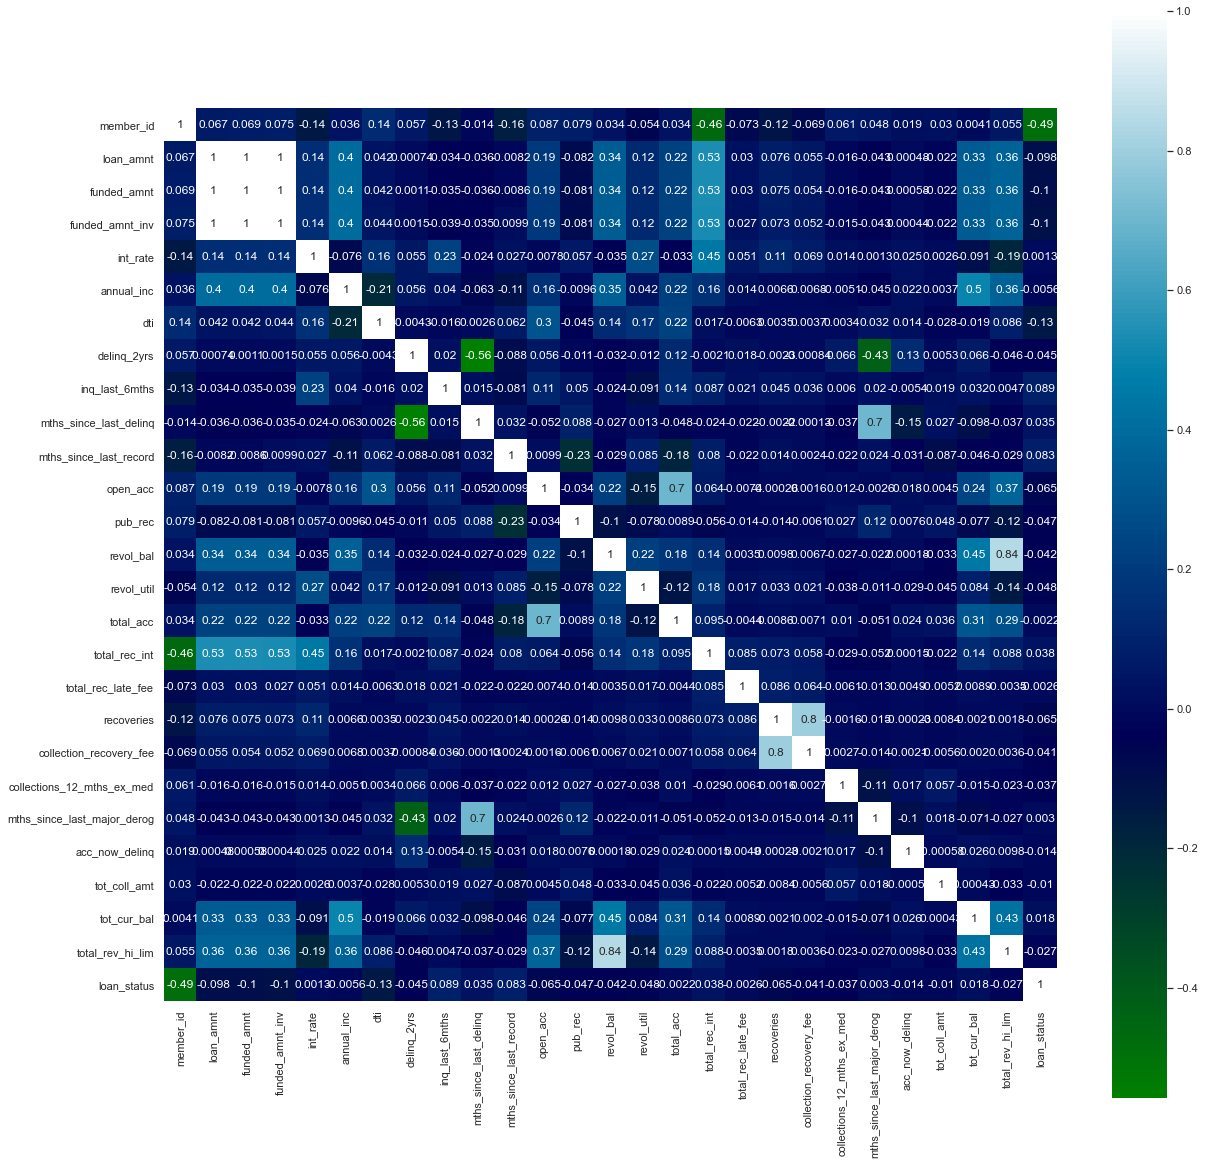

In [11]:
#Plot a heatmap to identify the corelation of numerical data
plt.figure(figsize=(20,20))
sns.heatmap(df[num].corr(),annot=True,square=True,cmap='ocean')

In [12]:
#Check for null value counts in numerical columns
df[num].isnull().sum()

member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
annual_inc                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq         32831
mths_since_last_record         54349
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                        29
total_acc                          0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
collections_12_mths_ex_med         8
mths_since_last_major_derog    48155
acc_now_delinq                     0
tot_coll_amt                    5124
tot_cur_bal                     5124
total_rev_hi_lim                5124
loan_status                        0
d

<AxesSubplot:xlabel='revol_util', ylabel='Density'>

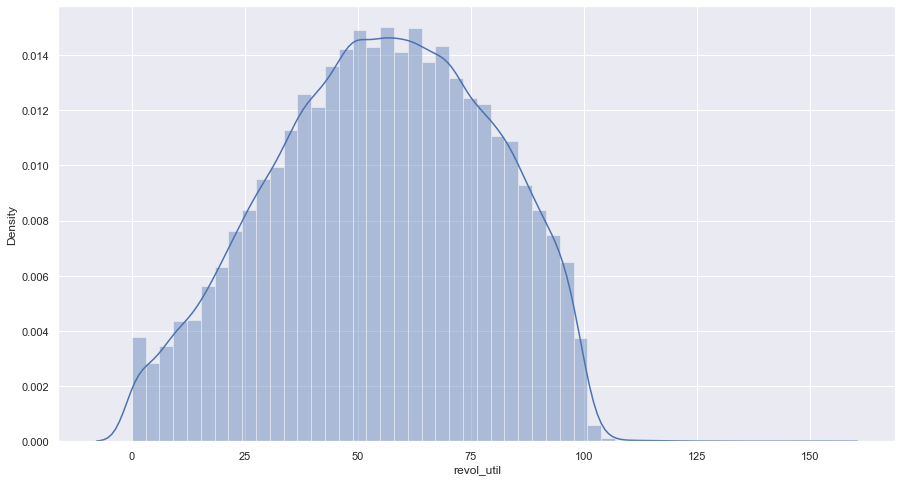

In [13]:
#Check data distribution of revol_util column
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(df['revol_util'])

<AxesSubplot:xlabel='collections_12_mths_ex_med', ylabel='Density'>

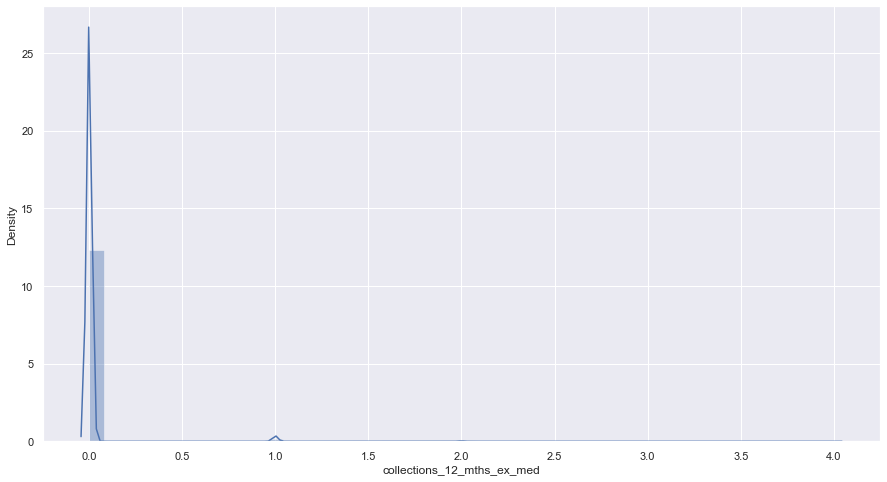

In [14]:
#Check data distribution of collections_12_mths_ex_med column
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(df['collections_12_mths_ex_med'])

<AxesSubplot:xlabel='tot_coll_amt', ylabel='Density'>

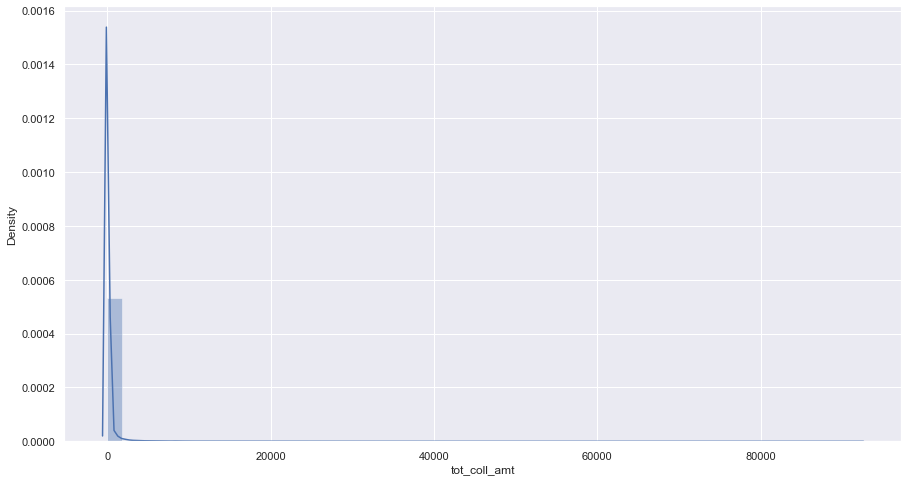

In [15]:
#Check data distribution of tot_coll_amt column
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(df['tot_coll_amt'])

<AxesSubplot:xlabel='tot_cur_bal', ylabel='Density'>

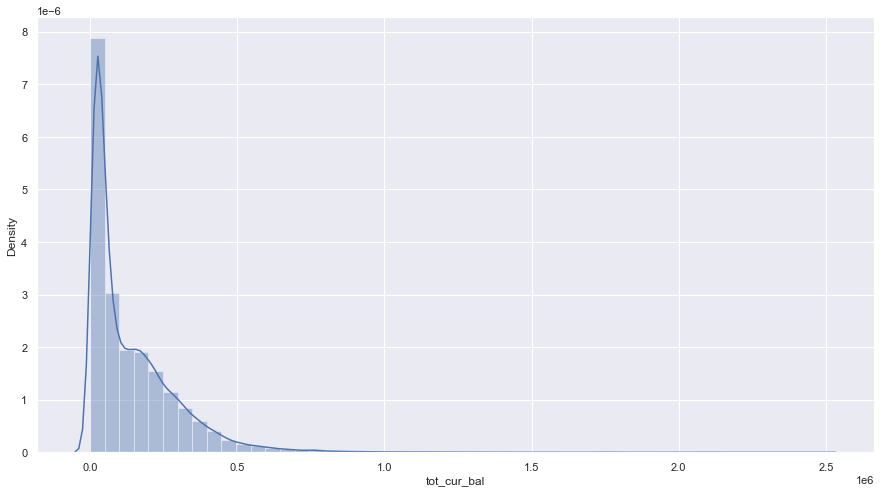

In [16]:
#Check data distribution of tot_cur_bal column
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(df['tot_cur_bal'])

<AxesSubplot:xlabel='total_rev_hi_lim', ylabel='Density'>

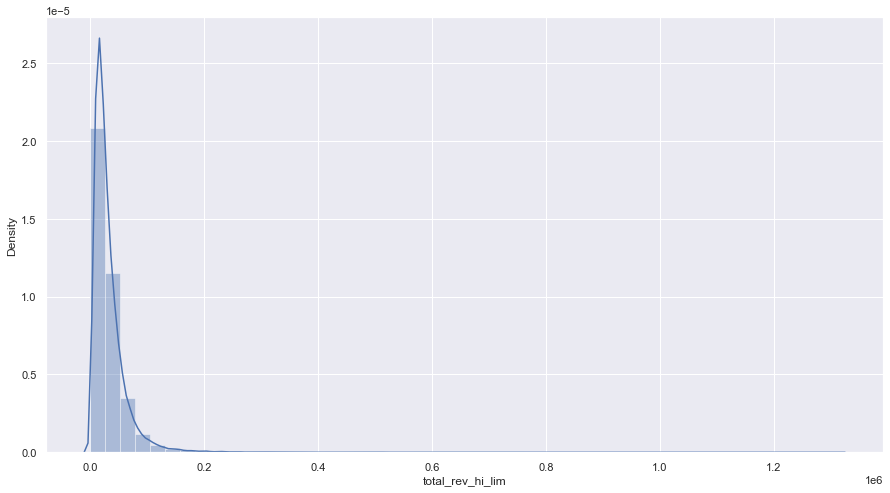

In [17]:
#Check data distribution of total_rev_hi_lim column
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(df['total_rev_hi_lim'])

<AxesSubplot:>

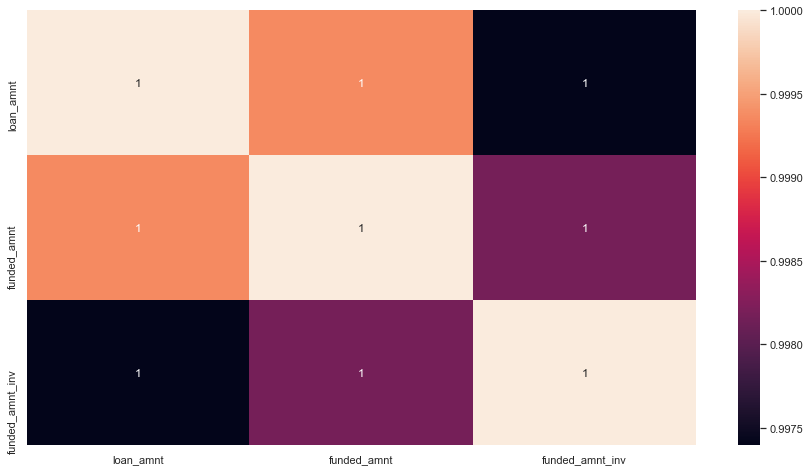

In [18]:
#This is related to the observation from the previous heatmap
### getting ratio of target variable to check balance between values
temp = ['loan_amnt','funded_amnt','funded_amnt_inv']
sns.heatmap(df[temp].corr(),annot=True)

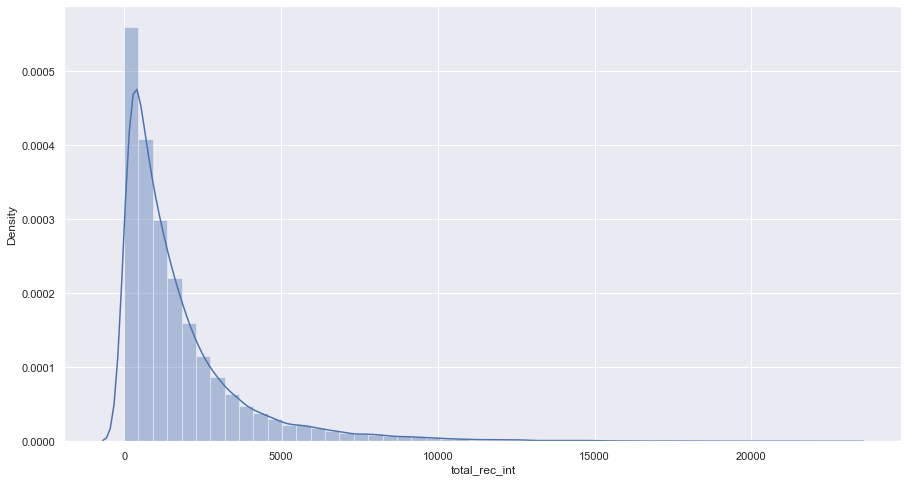

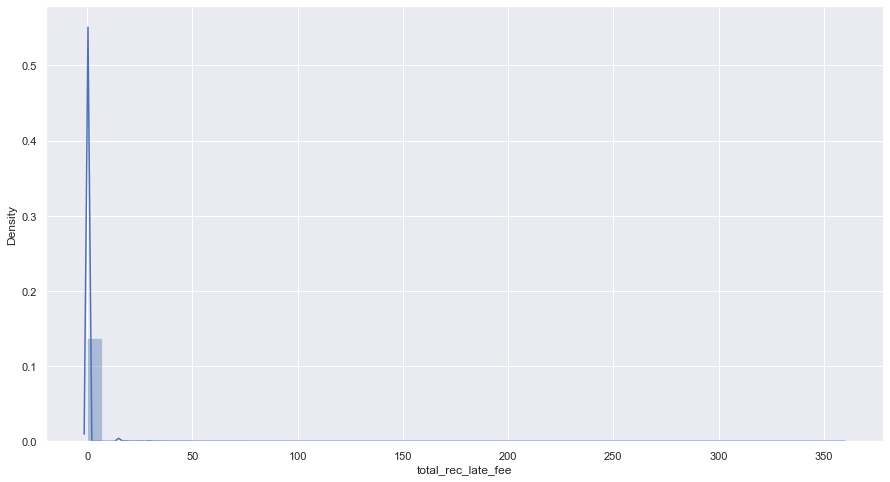

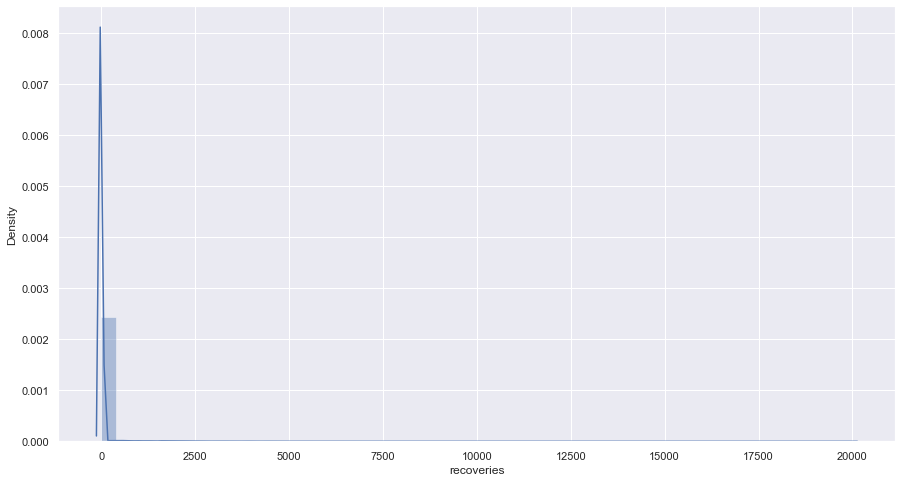

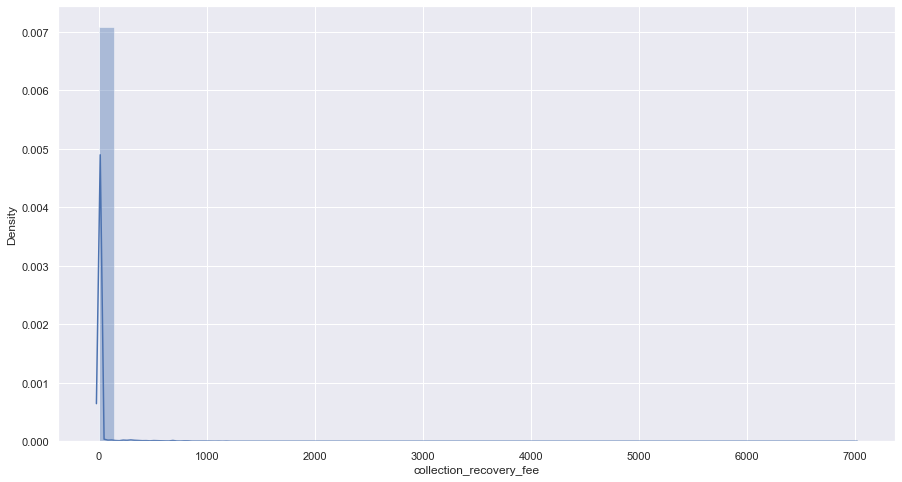

In [19]:
temp = ['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee']
for i in temp:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:xlabel='acc_now_delinq', ylabel='Density'>

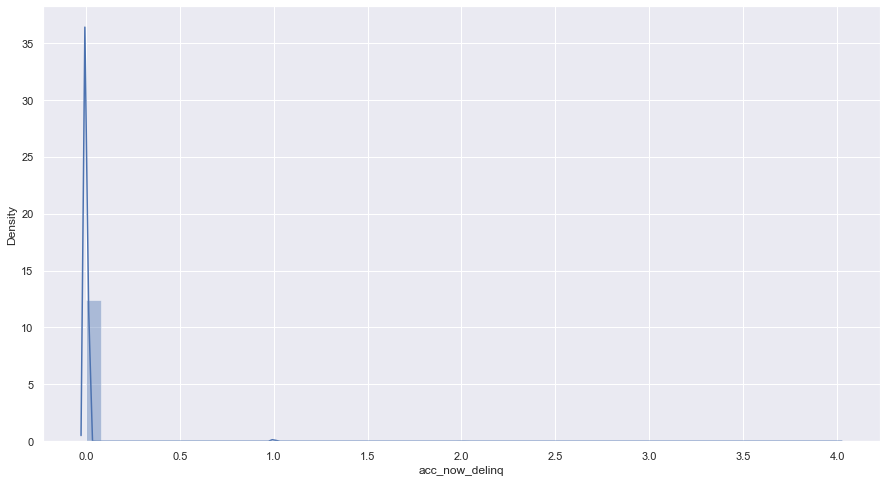

In [20]:
sns.distplot(df['acc_now_delinq'])

<AxesSubplot:xlabel='delinq_2yrs', ylabel='Density'>

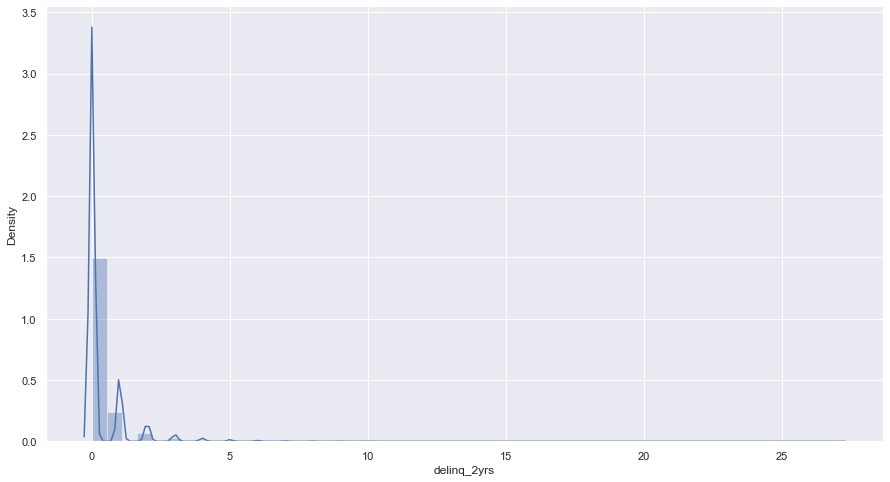

In [21]:
sns.distplot(df['delinq_2yrs'])

<AxesSubplot:xlabel='pub_rec', ylabel='Density'>

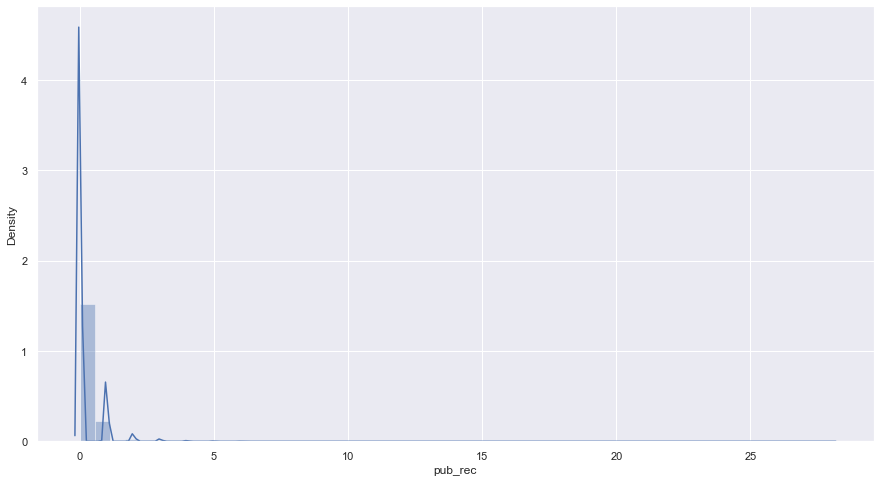

In [22]:
sns.distplot(df['pub_rec'])

**Analysing Categorical Data**

In [23]:
#Identifying categorical columns
cat = df.drop(num,axis=1).columns

In [24]:
#checking the number of raws and columns cat data
df[cat].shape

(63999, 18)

In [25]:
df[cat].head(5)

term batch_enrolled grade sub_grade  \
0  36 months                    E        E3   
1  36 months     BAT1586599     B        B4   
2  36 months     BAT1586599     A        A4   
3  36 months     BAT4808022     D        D5   
4  36 months     BAT2833642     B        B2   

                           emp_title emp_length home_ownership  \
0                              clerk    9 years            OWN   
1         Human Resources Specialist   < 1 year       MORTGAGE   
2                             Driver    2 years            OWN   
3  Us office of Personnel Management  10+ years           RENT   
4        LAUSD-HOLLYWOOD HIGH SCHOOL  10+ years           RENT   

  verification_status pymnt_plan  \
0     Source Verified          n   
1     Source Verified          n   
2        Not Verified          n   
3        Not Verified          n   
4            Verified          n   

                                                desc             purpose  \
0                                                NaN  debt_consolidation   
1                                                NaN    home_improvement   
2                                                NaN  debt_consolidation   
3  > My goal is to obtain a loan to pay off my hi...  debt_consolidation   
4                                                NaN         credit_card   

                title zip_code addr_state initial_list_status  \
0  Debt consolidation    349xx         FL                   f   
1    Home improvement    209xx         MD                   w   
2  Debt consolidation    447xx         OH                   w   
3  Debt consolidation    221xx         VA                   f   
4                refi    900xx         CA                   w   

  application_type verification_status_joint last_week_pay  
0       INDIVIDUAL                       NaN     26th week  
1       INDIVIDUAL                       NaN      9th week  
2       INDIVIDUAL                       NaN      9th week  
3       INDIVIDUAL                       NaN    135th week  
4       INDIVIDUAL                       NaN     96th week

In [26]:
#Check for null value counts in numerical columns
df[cat].isnull().sum()

term                             0
batch_enrolled               10264
grade                            0
sub_grade                        0
emp_title                     3826
emp_length                    3324
home_ownership                   0
verification_status              0
pymnt_plan                       0
desc                         54849
purpose                          0
title                           13
zip_code                         0
addr_state                       0
initial_list_status              0
application_type                 0
verification_status_joint    63971
last_week_pay                    0
dtype: int64

<AxesSubplot:xlabel='application_type', ylabel='count'>

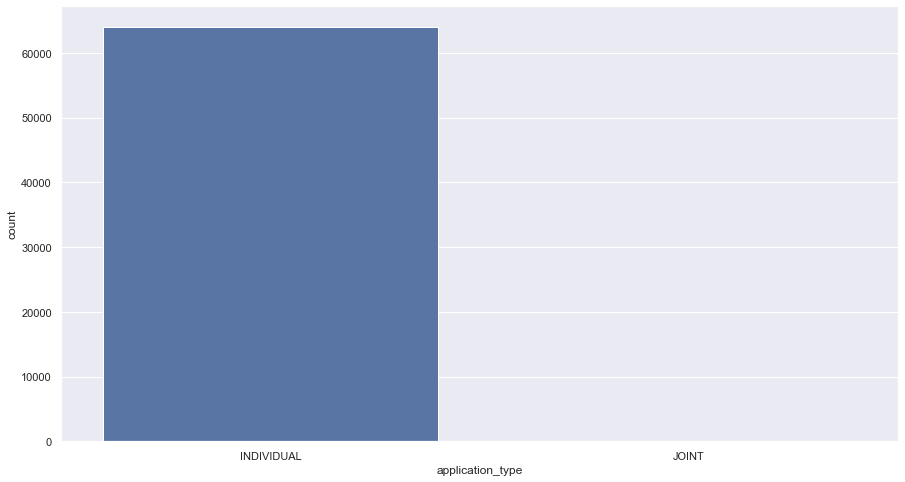

In [27]:
#This application_type column contain categorical data with two distinct values. So we use countplot to check the distribution
sns.countplot(df.application_type)

# **Data Wrangling & Cleaning**

In [28]:
#Removing most obvious unwanted columns using the heatmap to visualize distribution of null values
df.drop(['mths_since_last_delinq','mths_since_last_record',
               'mths_since_last_major_derog','pymnt_plan','desc',
               'verification_status_joint'],inplace=True,axis=1)

**Wrangling & Cleaning Numerical Data**

In [29]:
#Highly Co-related  Numerical Data Columns
toohightcorr_num = ['funded_amnt','funded_amnt_inv','total_rev_hi_lim','total_acc']
df.drop(toohightcorr_num,axis=1,inplace=True)

In [30]:
#Data has too many nulls and zeroes.
toohighnulls_num = ['collections_12_mths_ex_med','tot_coll_amt']
df.drop(toohighnulls_num,axis=1,inplace=True)

In [31]:
#Data has a bell distribution, so we impute median in nulls
df['revol_util'].fillna(value=df['revol_util'].median(),inplace=True)

In [32]:
#Data has a bell distribution, so we impute median in nulls
df['tot_cur_bal'].fillna(value=df['tot_cur_bal'].median(),inplace=True)

In [33]:
#According to the distribution following columns have very tall thin unimodal distribution. Thus we can remove that columns
tooThinDistribution = ['acc_now_delinq','delinq_2yrs','pub_rec','total_rec_late_fee','recoveries','collection_recovery_fee']
df.drop(tooThinDistribution,axis=1,inplace=True)

In [34]:
#Member id doesn't impact on output. so we can remove
ids = df['member_id']
df.drop('member_id',axis=1,inplace=True)

**Wrangling & Cleaning Categorical Data**

In [35]:
#Highly Co-related Categorical Columns (title->purpose)
toohightcorr_cat = ['grade','sub_grade','title']
df.drop(toohightcorr_cat,axis=1,inplace=True)

In [36]:
#Both batch enrolled, zip, and addr_state do not contain meaningful values.
temp = ['batch_enrolled','zip_code','addr_state'] 
df.drop(temp,axis=1,inplace=True)

In [37]:
#Fill null values of emp_title with the word "Unknown"
df['emp_title'].fillna(value="Unknown",inplace=True)

In [38]:
#Convert to string
df['emp_length'] = df['emp_length'].astype(str)

#Remove all non numeric characters
df['emp_length'].replace("[^0-9]","",regex=True,inplace=True)

# Replace corrupted raws with -1
df['emp_length'].replace("","-1",regex=True,inplace=True)

#Reshape the output
df['emp_length'] = df['emp_length'].apply(lambda x: x.strip())

#Convert to int
df['emp_length'] = df['emp_length'].astype(int)

#Replace null values with -1
df['emp_length'].fillna(value='-1',inplace=True)

df['emp_length'].head(10)


0     9
1     1
2     2
3    10
4    10
5     2
6     5
7     8
8     7
9     2
Name: emp_length, dtype: int32

In [39]:
#Split the values by space delimiter and take only the values
df.term = df.term.apply(lambda x: x.split(' ')[0])

#Convert the values to int
df.term = df.term.astype(int)

In [40]:
# extracts the number form 'last_week_pay'
df['last_week_pay'] = df['last_week_pay'].astype(str)
df['last_week_pay'].replace("[^0-9]","",regex=True,inplace=True)
df['last_week_pay'].replace("","-1",regex=True,inplace=True)
df['last_week_pay'] = df['last_week_pay'].apply(lambda x: x.strip())
df.last_week_pay = df.last_week_pay.astype(int)

In [41]:
## application_type is a one sided data according to countplot. so we drop column
df.drop('application_type',axis=1,inplace=True)

# **Data Preprocessing**

In [42]:
#This library covert cat to num
from sklearn.preprocessing import LabelEncoder

In [43]:
#get the remaining cat columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=numerics).columns
cat = df.drop(num,axis=1)
cat = cat.columns

In [44]:
#Check remaining Categorical data
df[cat].head(5)

emp_title home_ownership verification_status  \
0                              clerk            OWN     Source Verified   
1         Human Resources Specialist       MORTGAGE     Source Verified   
2                             Driver            OWN        Not Verified   
3  Us office of Personnel Management           RENT        Not Verified   
4        LAUSD-HOLLYWOOD HIGH SCHOOL           RENT            Verified   

              purpose initial_list_status  
0  debt_consolidation                   f  
1    home_improvement                   w  
2  debt_consolidation                   w  
3  debt_consolidation                   f  
4         credit_card                   w

In [45]:
#Converting cat to num
df[cat] = df[cat].apply(LabelEncoder().fit_transform)

In [46]:
#Check converted cat to num data
df[cat].head(5)

emp_title  home_ownership  verification_status  purpose  \
0      27675               4                    1        2   
1      11376               1                    1        4   
2       7787               4                    0        2   
3      25640               5                    0        2   
4      12802               5                    2        1   

   initial_list_status  
0                    0  
1                    1  
2                    1  
3                    0  
4                    1

In [47]:
#Check remaining Numerical data
df[num].head(5)

loan_amnt  term  int_rate  emp_length  annual_inc    dti  inq_last_6mths  \
0      14350    36     19.19           9     28700.0  33.88               1   
1       4800    36     10.99           1     65000.0   3.64               1   
2      10000    36      7.26           2     45000.0  18.42               0   
3      15000    36     19.72          10    105000.0  14.97               2   
4      16000    36     10.64          10     52000.0  20.16               0   

   open_acc  revol_bal  revol_util  total_rec_int  last_week_pay  tot_cur_bal  \
0        14      22515        73.1        1173.84             26      28699.0   
1         6       7624        23.2          83.95              9       9974.0   
2         5      10877        31.2          56.47              9      38295.0   
3        10      13712        55.5        4858.62            135      55564.0   
4        11      35835        76.2        2296.41             96      47159.0   

   loan_status  
0            0  
1            0  
2            0  
3            0  
4            0

<AxesSubplot:>

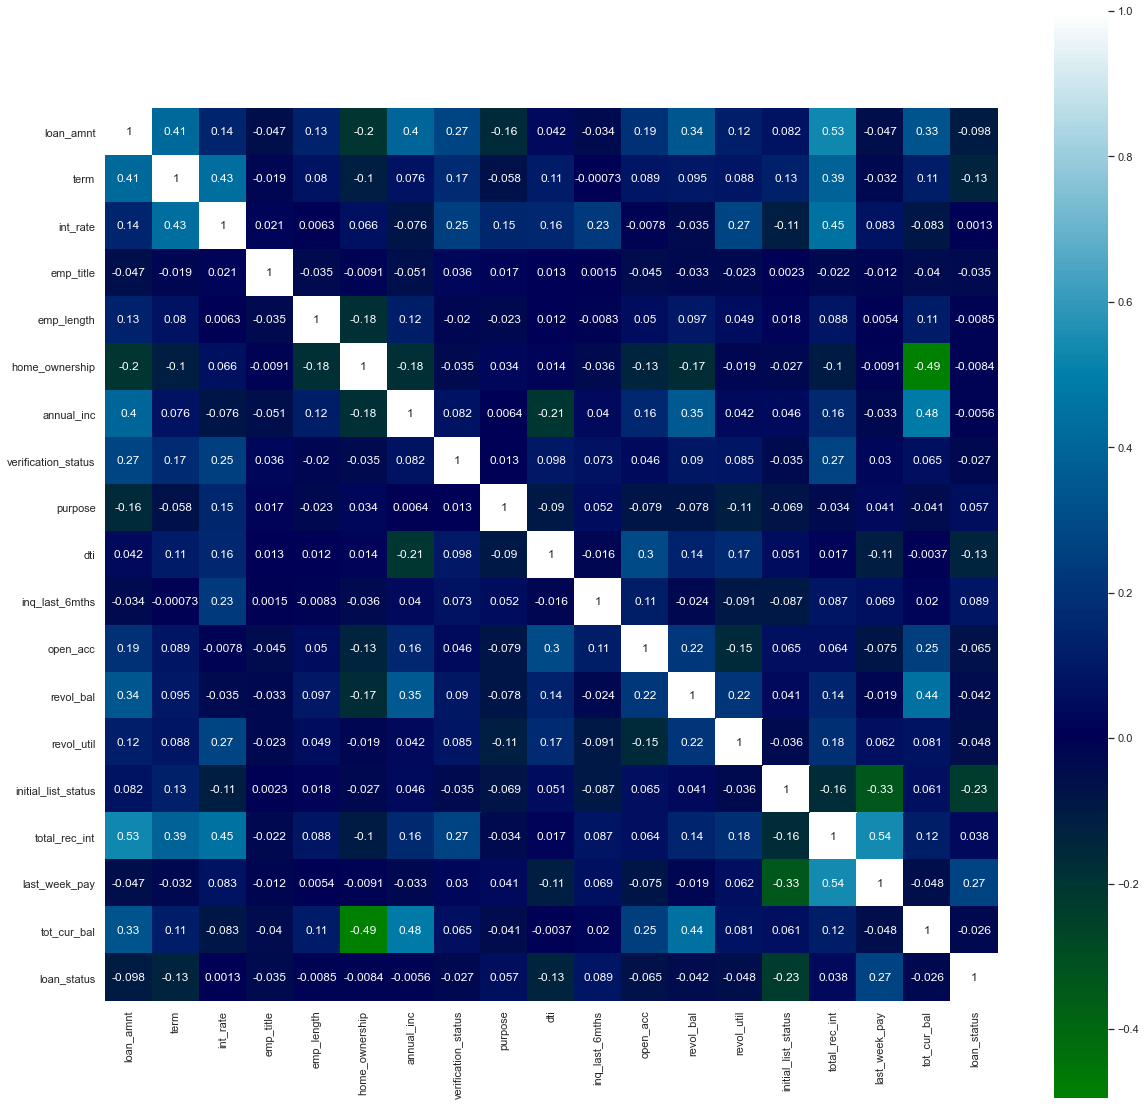

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,square=True,cmap='ocean')

# **Machine learning Algorithm**

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [50]:
#Defining target values and input values
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [51]:
#Split into training and testing data sets(7:3)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

**1st Algorithm -  Random Forest Classifier**

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
#Initiate the random forest classifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=8, random_state=101,class_weight='balanced')

#Train the RFC with the data set
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=101)

In [54]:
#Get the predicted output for the test data set
y_pred = rfc.predict(X_test)

In [55]:
acc_rfc = accuracy_score(y_test , y_pred)*100

In [56]:
print('Accuracy :',metrics.accuracy_score(y_test, y_pred))
print('Precision:\n',metrics.precision_score(y_test, y_pred))
print('Recall:\n',metrics.recall_score(y_test, y_pred))
print('f1 score:\n',metrics.f1_score(y_test, y_pred, average=None))
print('Report:\n',classification_report(y_test, y_pred))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(rfc, X, y, cv=3).mean())

Accuracy : 0.72109375
Precision:
 0.44014789708827606
Recall:
 0.6240716470074268
f1 score:
 [0.80406864 0.51621646]
Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80     14622
           1       0.44      0.62      0.52      4578

    accuracy                           0.72     19200
   macro avg       0.65      0.69      0.66     19200
weighted avg       0.76      0.72      0.74     19200

confusion Matrix:
 [[10988  1721]
 [ 3634  2857]]
cross validation: 0.7298239034984921


**2nd Algorithm -  XGBClassifier**

In [57]:
from xgboost import XGBClassifier

In [58]:
xgb = XGBClassifier(n_estimator=100,max_depth=12,class_weight='balanced',refit='AUC')

In [59]:
xgb.fit(X_train,y_train)

[13:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight", "n_estimator", "refit" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=12,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=100, n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [60]:
y_pred = xgb.predict(X_test)

In [61]:
# Temporary variable for final data visualisation
tempval = pd.Series(y_test).value_counts()
tempvalpred = pd.Series(y_pred).value_counts()

xgb_ytest = y_test
xgb_ypred = y_pred

In [62]:
acc_xgb = accuracy_score(y_test , y_pred)*100

In [63]:
print('Accuracy :',metrics.accuracy_score(y_test, y_pred))
print('Precision:\n',metrics.precision_score(y_test, y_pred))
print('Recall:\n',metrics.recall_score(y_test, y_pred))
print('f1 score:\n',metrics.f1_score(y_test, y_pred, average=None))
print('Report:\n',classification_report(y_test, y_pred))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))

Accuracy : 0.84953125
Precision:
 0.7949703108627314
Recall:
 0.49716033202271737
f1 score:
 [0.90668303 0.61174573]
Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     14622
           1       0.79      0.50      0.61      4578

    accuracy                           0.85     19200
   macro avg       0.83      0.73      0.76     19200
weighted avg       0.84      0.85      0.84     19200

confusion Matrix:
 [[14035  2302]
 [  587  2276]]


**3rd Algorithm -  K Neighbors Classifier**

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn.predict(X_test)

In [68]:
acc_knn = accuracy_score(y_test , y_pred)*100

In [69]:
print('Accuracy :',metrics.accuracy_score(y_test, y_pred))
print('Precision:\n',metrics.precision_score(y_test, y_pred))
print('Recall:\n',metrics.recall_score(y_test, y_pred))
print('f1 score:\n',metrics.f1_score(y_test, y_pred, average=None))
print('Report:\n',classification_report(y_test, y_pred))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))

Accuracy : 0.7603645833333333
Precision:
 0.4956223829463266
Recall:
 0.28440366972477066
f1 score:
 [0.85250841 0.36141568]
Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     14622
           1       0.50      0.28      0.36      4578

    accuracy                           0.76     19200
   macro avg       0.65      0.60      0.61     19200
weighted avg       0.73      0.76      0.74     19200

confusion Matrix:
 [[13297  3276]
 [ 1325  1302]]


**4th Algorithm -  Gaussian Naive Bayes**

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
gnb = GaussianNB()

In [72]:
gnb.fit(X_train,y_train)

GaussianNB()

In [73]:
y_pred = gnb.predict(X_test)

In [74]:
acc_gnb = accuracy_score(y_test , y_pred)*100

In [75]:
print('Accuracy :',metrics.accuracy_score(y_test, y_pred))
print('Precision:\n',metrics.precision_score(y_test, y_pred))
print('Recall:\n',metrics.recall_score(y_test, y_pred))
print('f1 score:\n',metrics.f1_score(y_test, y_pred, average=None))
print('Report:\n',classification_report(y_test, y_pred))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))

Accuracy : 0.7553125
Precision:
 0.48115577889447236
Recall:
 0.3346439493228484
f1 score:
 [0.84666101 0.39474362]
Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85     14622
           1       0.48      0.33      0.39      4578

    accuracy                           0.76     19200
   macro avg       0.65      0.61      0.62     19200
weighted avg       0.73      0.76      0.74     19200

confusion Matrix:
 [[12970  3046]
 [ 1652  1532]]


**5th Algorithm -  Support Vector Machine(SVM)**

In [76]:
from sklearn.svm import SVC

In [77]:
svc = SVC(kernel='rbf')

In [78]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [79]:
acc_svc = accuracy_score(y_test , y_pred)*100

In [80]:
print('Accuracy :',metrics.accuracy_score(y_test, y_pred))
print('Precision:\n',metrics.precision_score(y_test, y_pred))
print('Recall:\n',metrics.recall_score(y_test, y_pred))
print('f1 score:\n',metrics.f1_score(y_test, y_pred, average=None))
print('Report:\n',classification_report(y_test, y_pred))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))

Accuracy : 0.7615625
Precision:
 0.0
Recall:
 0.0
f1 score:
 [0.86464431 0.        ]
Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     14622
           1       0.00      0.00      0.00      4578

    accuracy                           0.76     19200
   macro avg       0.38      0.50      0.43     19200
weighted avg       0.58      0.76      0.66     19200

confusion Matrix:
 [[14622  4578]
 [    0     0]]


**6th Algorithm - LogisticRegression**

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression(max_iter = 250)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=250)

In [83]:
y_pred = lr.predict(X_test)

In [84]:
acc_lr = accuracy_score(y_test , y_pred)*100

In [85]:
print('Accuracy :',metrics.accuracy_score(y_test, y_pred))
print('Precision:\n',metrics.precision_score(y_test, y_pred))
print('Recall:\n',metrics.recall_score(y_test, y_pred))
print('f1 score:\n',metrics.f1_score(y_test, y_pred, average=None))
print('Report:\n',classification_report(y_test, y_pred))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))

Accuracy : 0.77984375
Precision:
 0.6437346437346437
Recall:
 0.17169069462647443
f1 score:
 [0.8703414  0.27108122]
Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     14622
           1       0.64      0.17      0.27      4578

    accuracy                           0.78     19200
   macro avg       0.72      0.57      0.57     19200
weighted avg       0.75      0.78      0.73     19200

confusion Matrix:
 [[14187  3792]
 [  435   786]]


**7th Algorithm - LightGBM**

In [86]:
import lightgbm as lgb

In [87]:
lgbm = lgb.LGBMClassifier(n_estimators=600,random_state=101,max_depth=8,class_weight='balanced')

In [88]:
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [89]:
acc_lgbm = accuracy_score(y_test , y_pred)*100

In [90]:
print('Accuracy :',metrics.accuracy_score(y_test, y_pred))
print('Precision:\n',metrics.precision_score(y_test, y_pred))
print('Recall:\n',metrics.recall_score(y_test, y_pred))
print('f1 score:\n',metrics.f1_score(y_test, y_pred, average=None))
print('Report:\n',classification_report(y_test, y_pred))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))

Accuracy : 0.8449479166666667
Precision:
 0.6650855846566303
Recall:
 0.7044560943643512
f1 score:
 [0.89724916 0.68420494]
Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     14622
           1       0.67      0.70      0.68      4578

    accuracy                           0.84     19200
   macro avg       0.79      0.80      0.79     19200
weighted avg       0.85      0.84      0.85     19200

confusion Matrix:
 [[12998  1353]
 [ 1624  3225]]


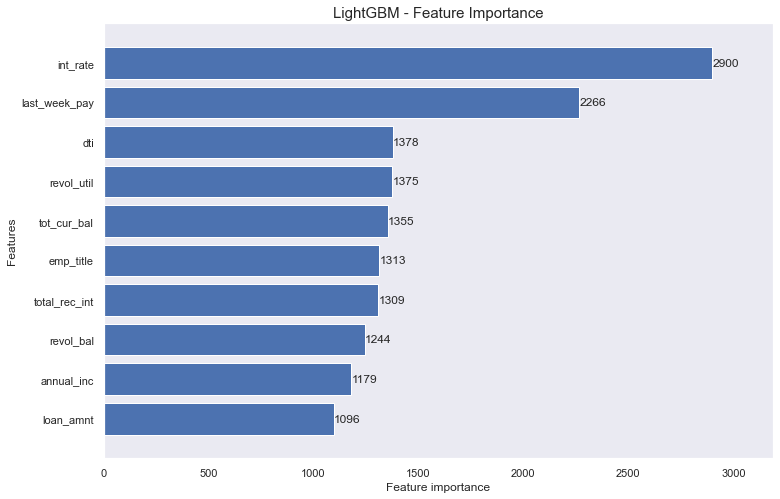

In [91]:
fig, ax = plt.subplots(figsize=(12,8))
lgb.plot_importance(lgbm, max_num_features=10, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

# **Analyzing & Visualizing Results**

In [92]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGB','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','LogisticRegression','LightGBM'],
    'Score': [acc_rfc , acc_xgb , acc_knn , acc_gnb ,acc_svc, acc_lr ,acc_lgbm ]})
models.sort_values(by='Score', ascending=False)

Model      Score
1                   XGB  84.953125
6              LightGBM  84.494792
5    LogisticRegression  77.984375
4                   SVM  76.156250
2  K- Nearest Neighbour  76.036458
3           Naive Bayes  75.531250
0         Random Forest  72.109375

In [93]:
y_pred_rfc = rfc.predict(X_train)
y_pred_xgb = xgb.predict(X_train)
y_pred_knn = knn.predict(X_train)
y_pred_gnb = gnb.predict(X_train)
y_pred_svm = svc.predict(X_train)
y_pred_lr = lr.predict(X_train)
y_pred_lgbm = lgbm.predict(X_train)

In [94]:
data_preproc = pd.DataFrame({
    'accuracy': y_train,
    'ground truth': y_train,
    'rfc': y_pred_rfc,
    'xgb': y_pred_xgb,
    'knn': y_pred_knn,
    'gnb': y_pred_gnb,
    'svm': y_pred_svm,
    'lr': y_pred_lr,
    'lgbm': y_pred_lgbm
    })

<AxesSubplot:xlabel='accuracy', ylabel='value'>

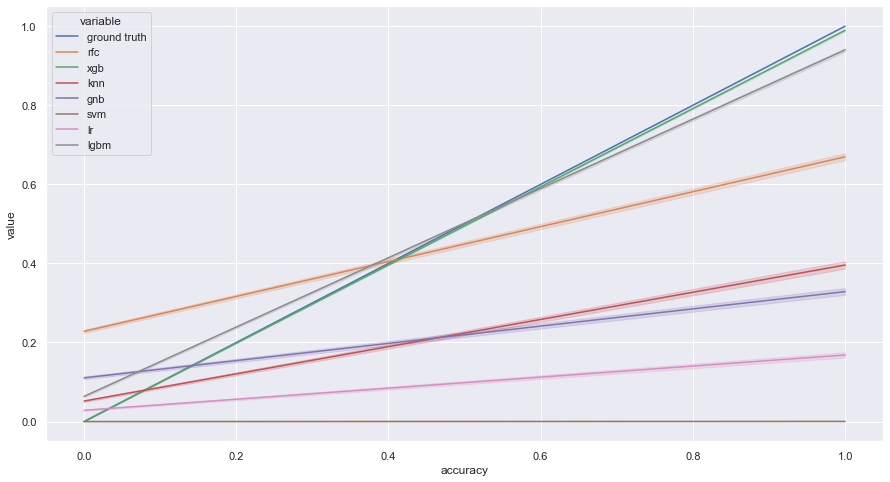

In [95]:
#plot of cross validation
sns.lineplot(x='accuracy', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['accuracy']))

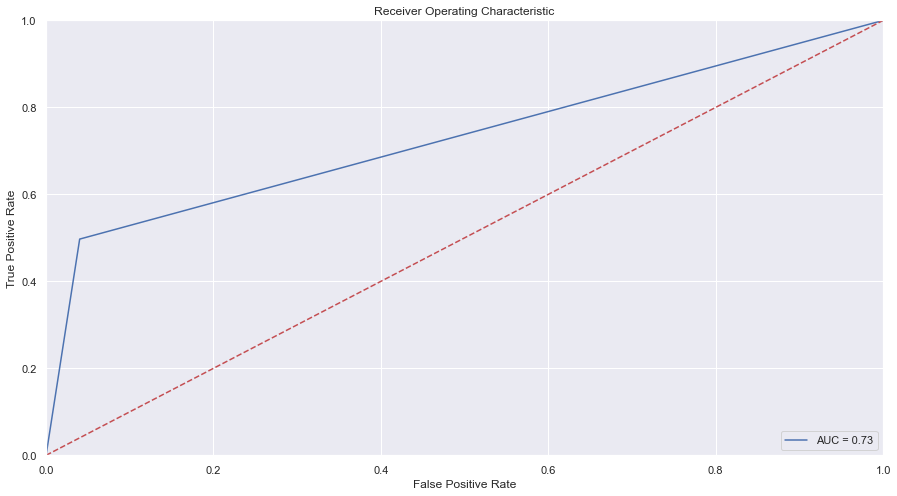

In [96]:
fpr, tpr, threshold = metrics.roc_curve(xgb_ytest, xgb_ypred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

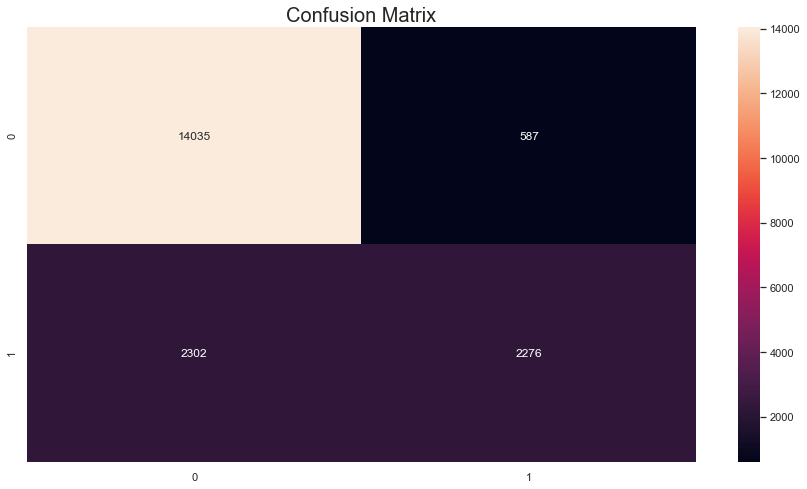

In [97]:
sns.heatmap(confusion_matrix(xgb_ytest,xgb_ypred),annot=True,fmt='d')
plt.title('Confusion Matrix',size=20)

In [98]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

labels = ['Loan Granted','Loan Not Granted']

fig1 = make_subplots(rows=1, cols=2)
fig1.add_trace(go.Pie(labels=labels, values=tempval))
fig2 = make_subplots(rows=1, cols=2)
fig2.add_trace(go.Pie(labels=labels,values=tempvalpred))

# Use `hole` to create a donut-like pie chart
fig1.update_traces(hole=.4, hoverinfo="label+percent+name")
fig2.update_traces(hole=.4, hoverinfo="label+percent+name")

fig1.update_layout(
    title_text="Predicted Vs Actual Loan Granted Ratio Comparision",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Actual Loan Status Ratio', x=0.25, y=0.5, font_size=20, showarrow=False)])
fig2.update_layout(
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Predicted Loan Status Ratio', x=0.25,y=0.5, font_size=20, showarrow=False)])


fig1.show()
fig2.show()